In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
import statsmodels
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,5)

In [7]:
import warnings
warnings.filterwarnings('ignore')

## 2. Recall the dataset “robot” firstly introduced in TSA HW06.Recall the dataset “robot” firstly introduced in TSA HW06

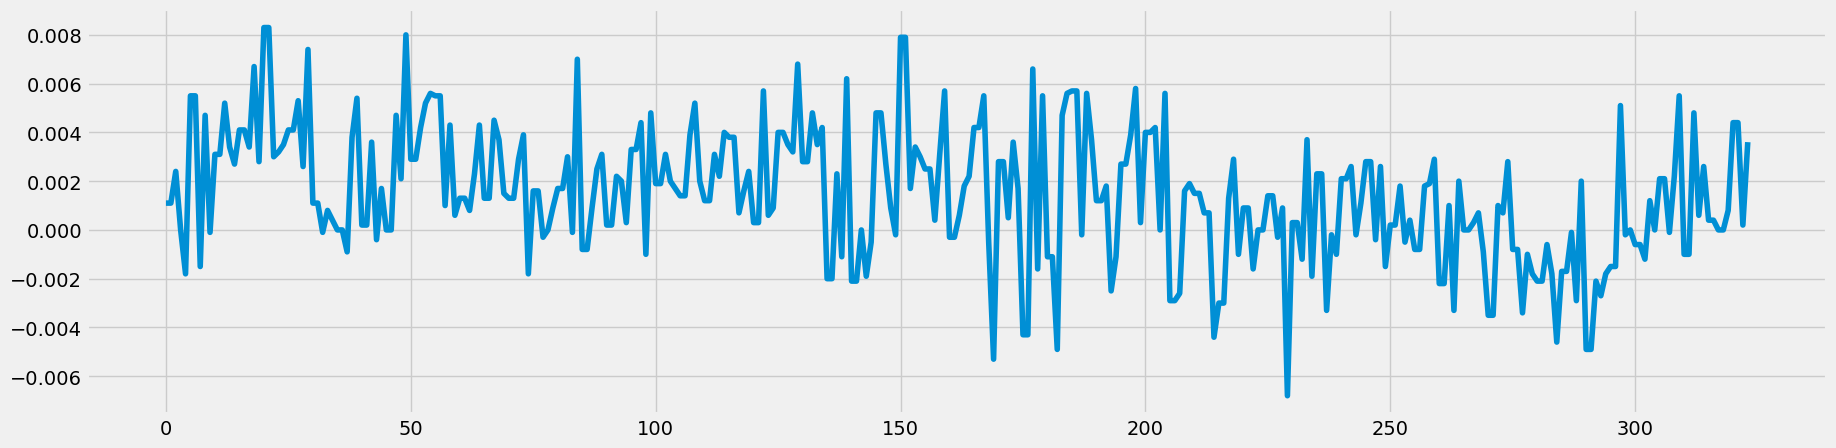

In [4]:
df_robot = pd.read_csv('data/robot.csv')
df_robot.robot.plot();

### (a) Use IMA(1, 1) to forecast five values ahead and calculate the 95% confidence intervals.

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
model = ARIMA(
    df_robot.robot,
    order=(0, 1, 1),
)
robotima = model.fit()
robotima_forec = robotima.get_forecast(steps=5, alpha=0.05)
robotima_forec.predicted_mean

324    0.002476
325    0.002476
326    0.002476
327    0.002476
328    0.002476
Name: predicted_mean, dtype: float64

In [9]:
robotima_forec.conf_int()

,lower robot,upper robot
324,-0.002498,0.007450
325,-0.002791,0.007742
326,-0.003067,0.008019
327,-0.003331,0.008283
328,-0.003583,0.008535


### (b) Display the actual values, the five forecasts and the 95% confidence intervals of the five forecasts, all in one graph. What do you observe?

- what I have observed is that all the predicted values is the same and the confidence region is larger as more being predicted

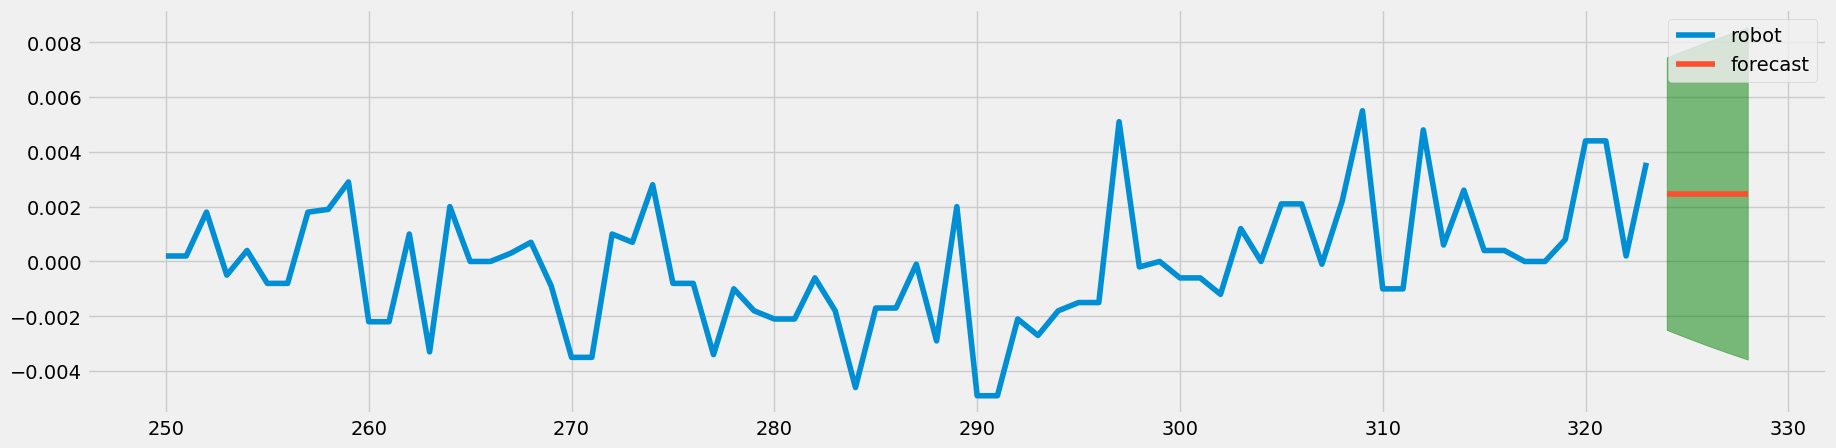

In [10]:
ax = df_robot.robot[250:].plot()
robotima_forec.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(
    robotima_forec.conf_int().index,
    robotima_forec.conf_int().iloc[:, 0],
    robotima_forec.conf_int().iloc[:, 1],
    color='g',
    alpha=0.5
)
plt.legend();

### (c) Use ARMA(1, 1) to forecast five values ahead and calculate the 95% confidence intervals. Compare the results with those in (a), what do you observe?

- predicted values begin to diverse and the confident interval still being larger when more being predicted

In [11]:
model = ARIMA(
    df_robot.robot,
    order=(1, 0, 1),
)
robotima = model.fit()
robotarma_forec = robotima.get_forecast(steps=5, alpha=0.05)
robotarma_forec.predicted_mean

324    0.002116
325    0.002021
326    0.001940
327    0.001871
328    0.001811
Name: predicted_mean, dtype: float64

In [12]:
robotarma_forec.conf_int()

,lower robot,upper robot
324,-0.002694,0.006926
325,-0.002916,0.006958
326,-0.003088,0.006969
327,-0.003224,0.006965
328,-0.003331,0.006954


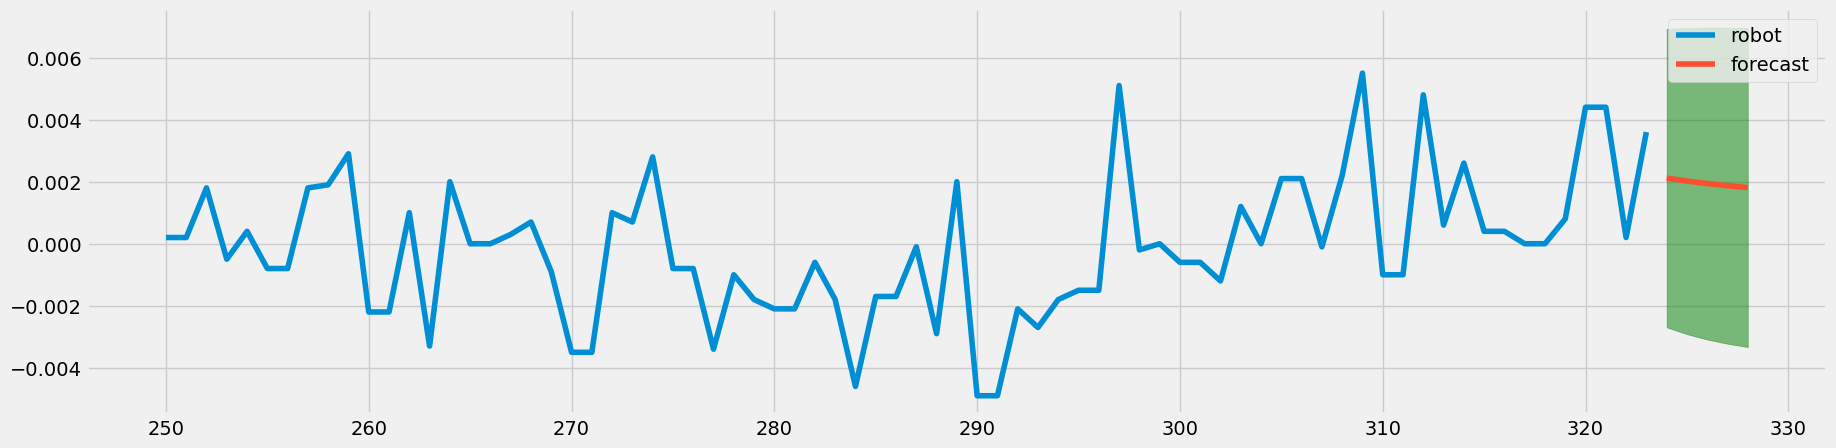

In [13]:
ax = df_robot.robot[250:].plot()
robotarma_forec.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(
    robotarma_forec.conf_int().index,
    robotarma_forec.conf_int().iloc[:, 0],
    robotarma_forec.conf_int().iloc[:, 1],
    color='g',
    alpha=0.5
)
plt.legend();

## 3. The dataset “boardings” contains the monthly number of passengers who boarded light rail trains and buses in Denver, Colorado, from August 2000 to March 2006.

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

### (a) Plot the time series and tell your observation if there exists seasonality and if the series is stationary. 

- there exists seasonality and it seems not being stationary

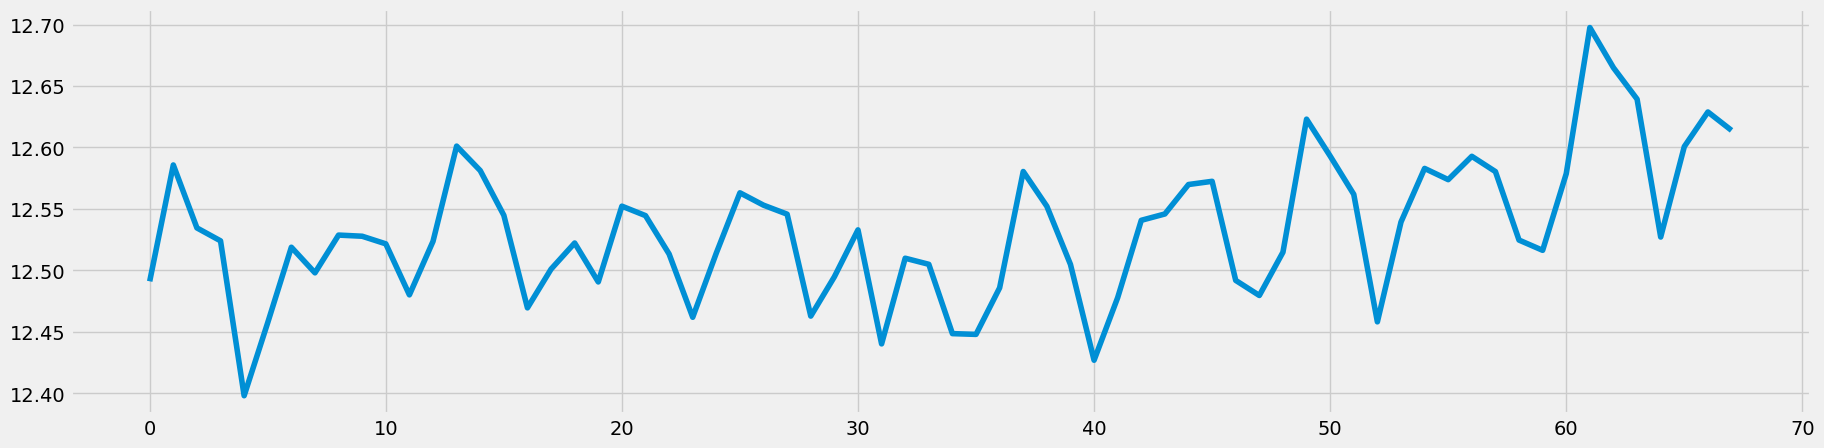

In [15]:
df_boardings = pd.read_csv('data/boardings.csv')
df_boardings.log_boardings.plot();

### (b) Plot the sample ACF and see what are the significant lags?

- lag 1, 5, 6, 12 periods appear to significant

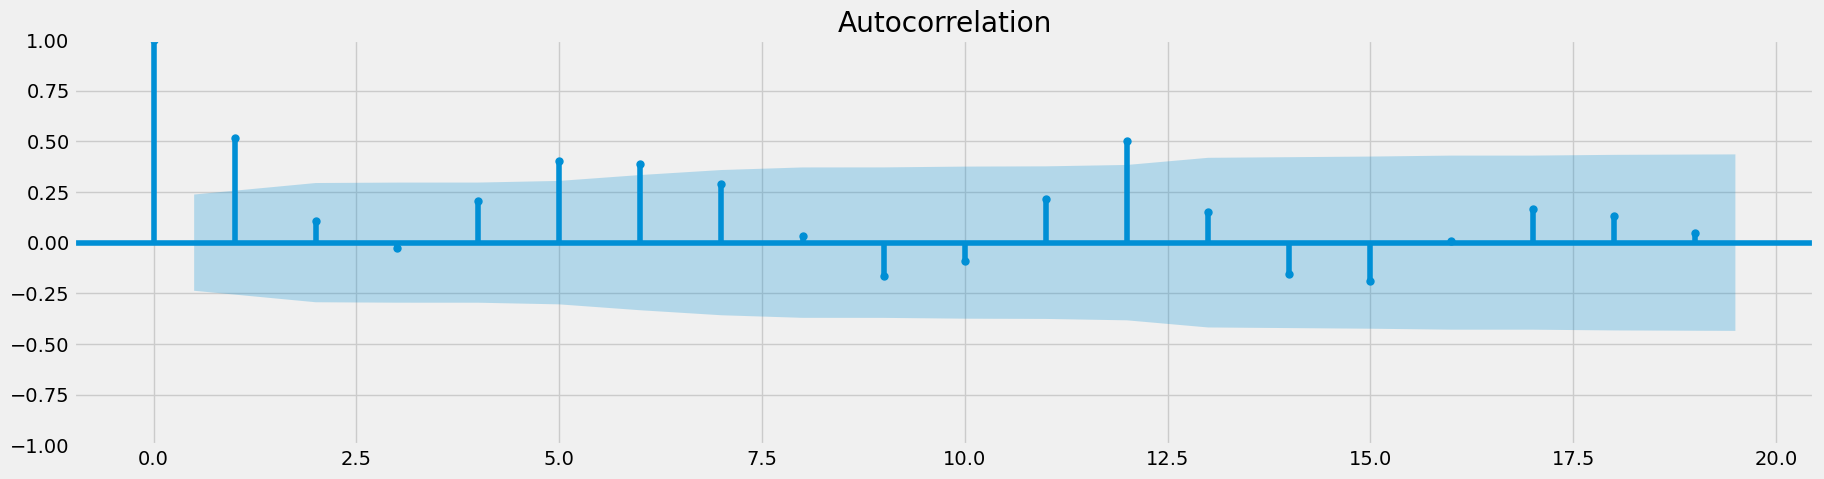

In [16]:
plot_acf(df_boardings);

### (c) Fit the data with ARMA(0, 3) × (1,0)12, evaluate if the estimated coefficients {𝜃̂1, 𝜃̂2, 𝜃̂3,𝜙̂12} are significant

- under 0.05 significance level, only 𝜙̂12 is significant

In [18]:
model = SARIMAX(
    df_boardings,
    order=(0, 0, 3),
    seasonal_order=(1, 0, 0, 12),
    enforce_invertibility=False,
    enforce_stationarity=False
)
boardings_sarma = model.fit()
boardings_sarma.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04930D+00    |proj g|=  6.56382D-02
  ys=-3.735E+01  -gs= 1.455E+00 BFGS update SKIPPED

At iterate    5    f= -1.75546D+00    |proj g|=  2.68205D-01
  ys=-1.823E-11  -gs= 1.715E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     36      2     2     0   2.696D-01  -1.755D+00
  F =  -1.7554590072661795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       log_boardings   No. Observations:                   68
Model:             SARIMAX(0, 0, 3)x(1, 0, [], 12)   Log Likelihood                 119.371
Date:                             Tue, 06 Dec 2022   AIC                           -228.742
Time:                                     15:46:54   BIC                           -218.616
Sample:                                          0   HQIC                          -224.816
                                              - 68                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          4.2714     12.931      0.330      0.741     -21.073      29.616
ma.L2         11.2112     18.469      0.607      0.544     -24.988      47.410
ma.L3          3.8621     13.384      0.289      0.773     -22.371      30.095
ar.S.L12       1.0016      0.001   1403.053      0.000       1.000       1.003
sigma2      8.703e-06   2.94e-05      0.296      0.767    -4.9e-05    6.64e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.43   Prob(JB):                         0.36
Heteroskedasticity (H):               0.78   Skew:                             0.33
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4. The monthly airline passengers, first investigated by Box and Jenkins in 1976, is considered as the classic time series dataset

In [19]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

### (a) Plot the time series in its original scale and the log-transformed scale. Do you think making the logtransformation is appropriate?

- in log scale, the series is still non-stationary so it's not appropriate

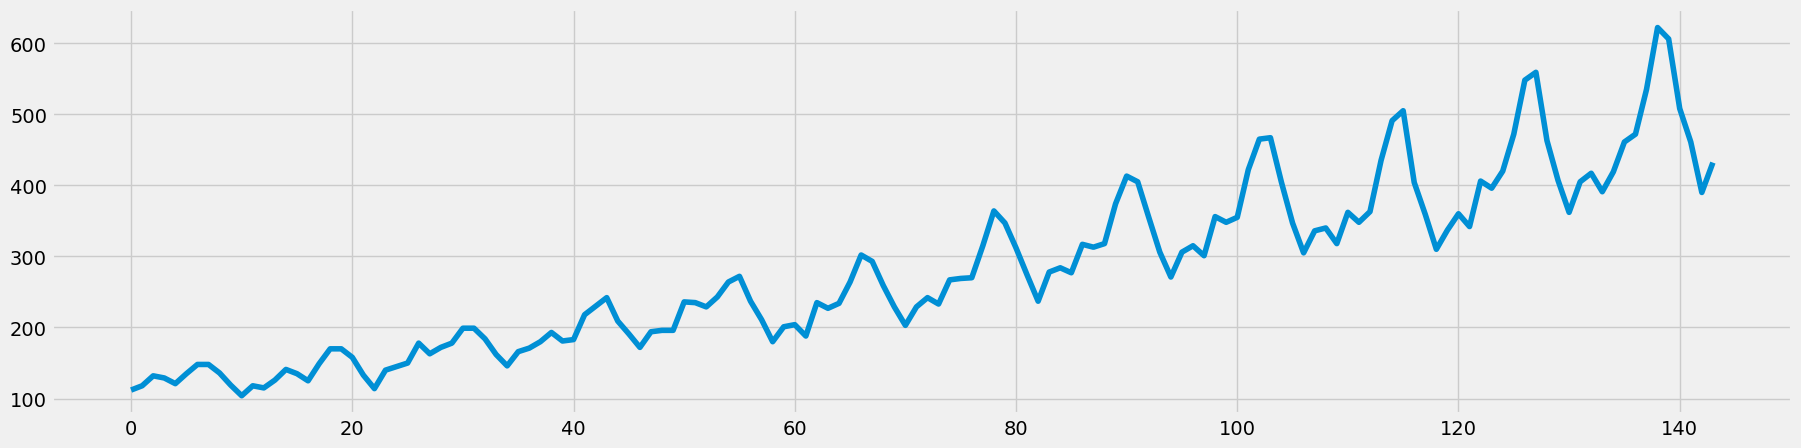

In [20]:
df_airpass = pd.read_csv('data/airpass.csv')
df_airpass.airpass.plot();

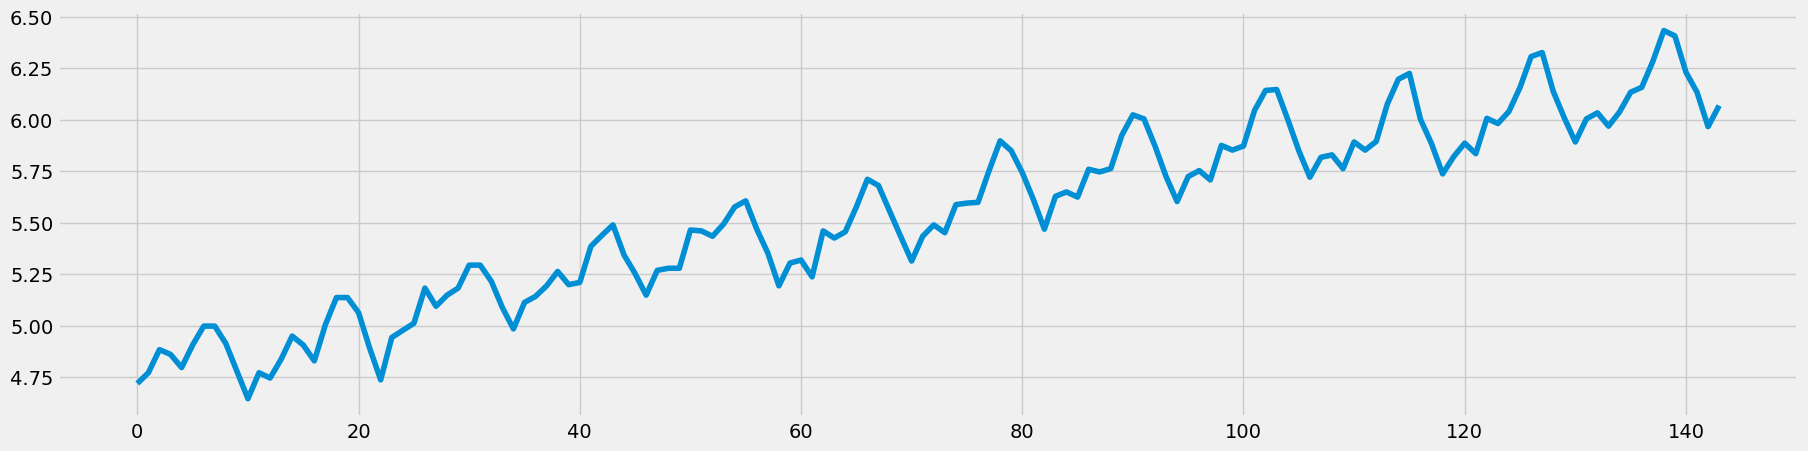

In [21]:
df_airpass_log = np.log(df_airpass)
df_airpass_log.airpass.plot();

### (b) Make the first-order difference over the “log-transformed” data. What do you observe?

- it's much more obvious being stationary

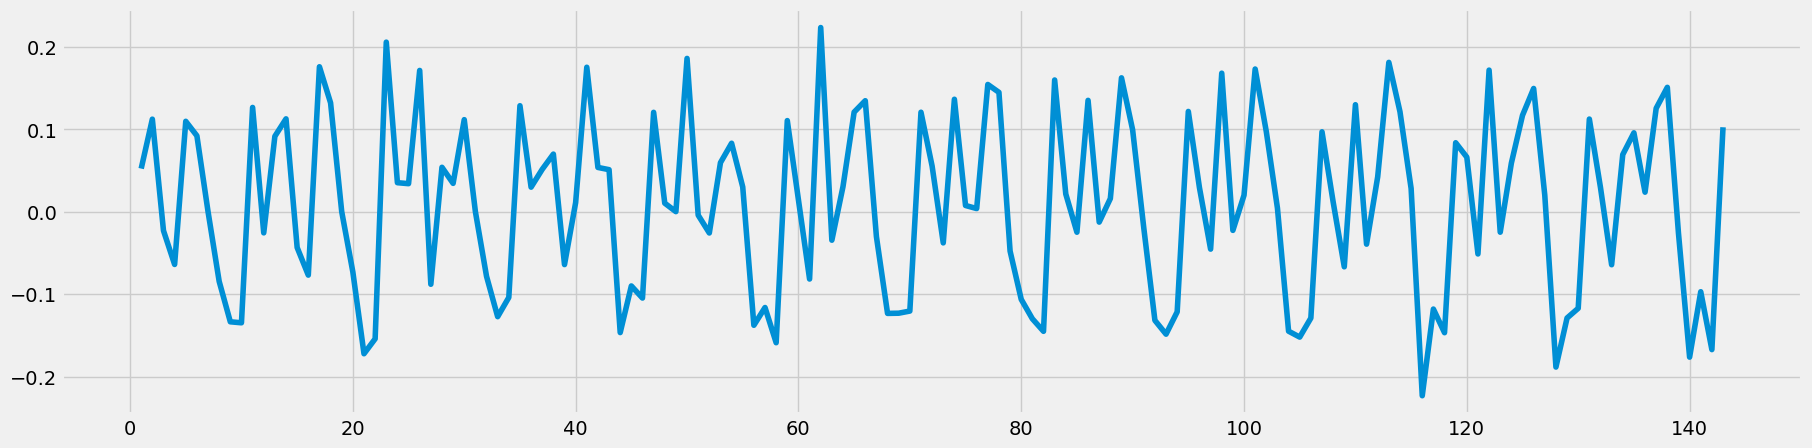

In [22]:
np.log(df_airpass.airpass).diff(1)[1:].plot();

### (c) Make a seasonal difference of the resulted series in (b), what do you observe?

- the variance seems not to be fixed

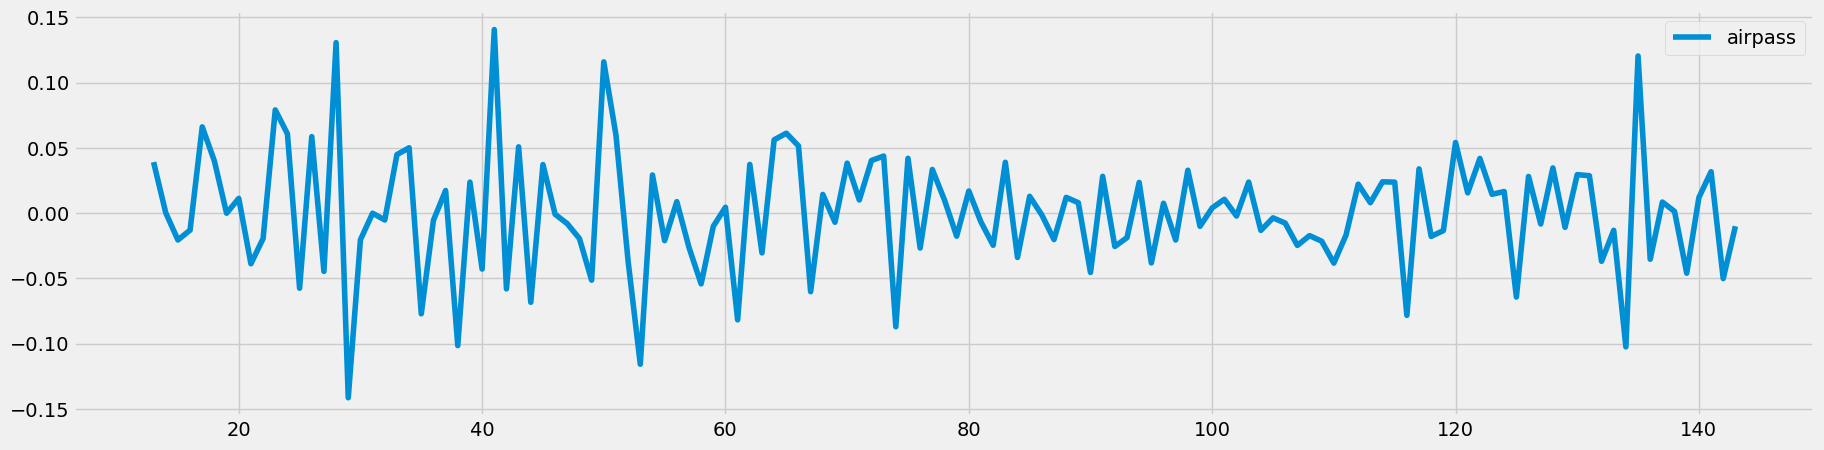

In [23]:
df_airpass_seasondiff = np.log(df_airpass).diff(1)[1:].diff(12)[12:]
df_airpass_seasondiff.plot();

### (d) Plot the sample ACF of the resulted series in (c), explain what you see.

- lag 1, 12 are significant which imply the little seasonality

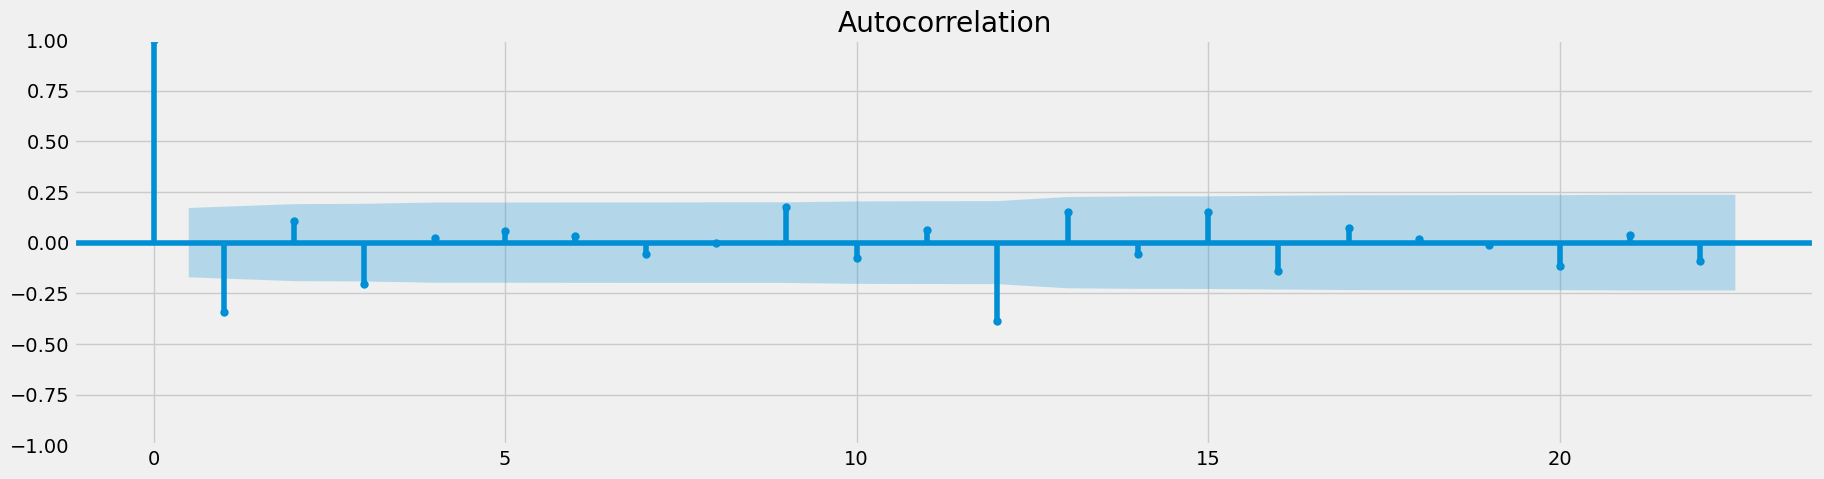

In [24]:
plot_acf(df_airpass_seasondiff);

### (e) Fit an ARIMA(0,1,1) × (0,1,1)12 model to the log-transformed series. Diagnose the residuals of this model, including the sample ACF and the normality test

In [25]:
model = SARIMAX(
    df_airpass_log,
    order=(0, 1, 1),
    seasonal_order=(0, 1, 1, 12)
)
airpass_sima = model.fit();

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66903D+00    |proj g|=  5.46246D+00

At iterate    5    f= -1.68810D+00    |proj g|=  1.71013D-01

At iterate   10    f= -1.69348D+00    |proj g|=  2.83631D+00

At iterate   15    f= -1.69921D+00    |proj g|=  3.70082D-02

At iterate   20    f= -1.69925D+00    |proj g|=  1.09351D-01

At iterate   25    f= -1.69928D+00    |proj g|=  8.56524D-03
  ys=-5.389E-09  -gs= 6.418E-09 BFGS update SKIPPED


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     62      1     1     0   3.405D-03  -1.699D+00
  F =  -1.6992810534021685     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


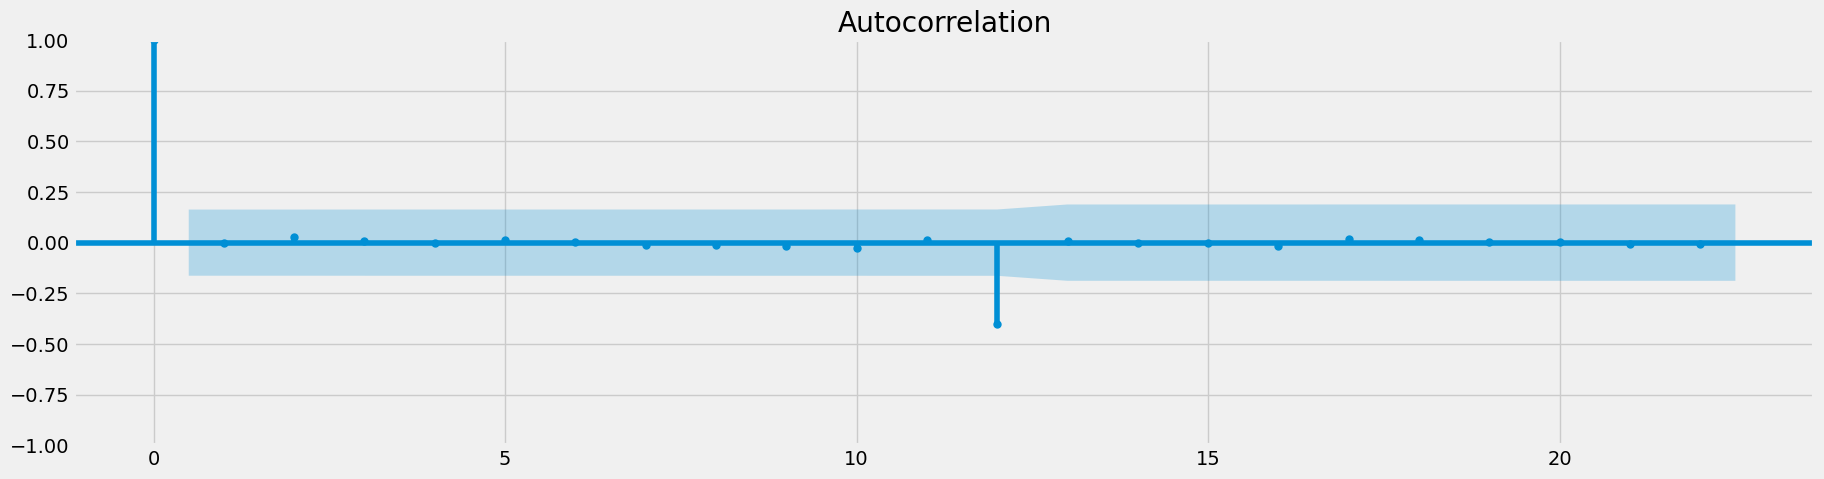

In [26]:
plot_acf(airpass_sima.resid);

In [27]:
# normality test
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(airpass_sima.resid)
lzip(name, test)

[('Jarque-Bera', 51503.64261905465),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 7.215435395059999),
 ('Kurtosis', 94.51879809497046)]

### (f) Make forecasts for “two” years based on the model in (e). The confidence intervals shall be included.

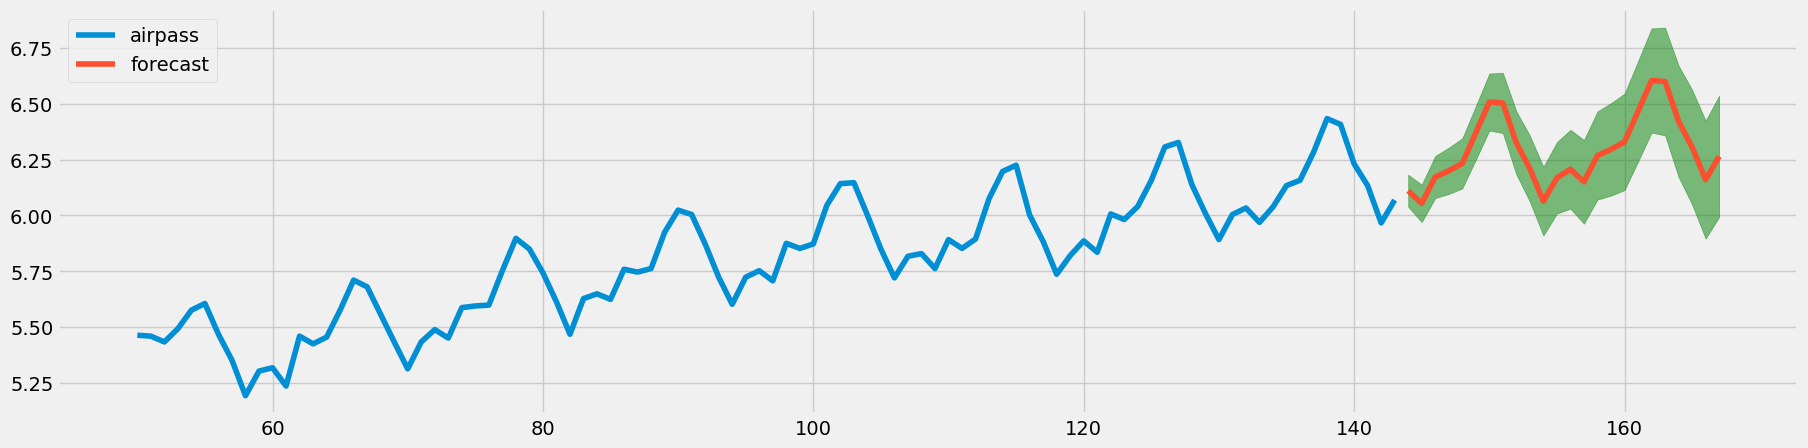

In [28]:
airpass_sima_forec = airpass_sima.get_forecast(steps=24, alpha=0.05)

ax = df_airpass_log.airpass[50:].plot()
airpass_sima_forec.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(
    airpass_sima_forec.conf_int().index,
    airpass_sima_forec.conf_int().iloc[:, 0],
    airpass_sima_forec.conf_int().iloc[:, 1],
    color='g',
    alpha=0.5
)
plt.legend();